In [3]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys

from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)

from scripts.indicators import find_pivots,donchian

c:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www\backtest
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [3]:
klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)


In [4]:

class Strategy:
       
    def signal(self,df):
        
        """ Pivots
        df['ma'] = df['close'].rolling(window=21).mean()
        
        df = find_pivots(df, dev_threshold = 3.0)
        
        df['compra'] = (df['close'] < df['ma']) & (df['min_pivot'] > 0)
        df['venta']  = (df['close'] > df['ma']) & (df['max_pivot'] > 0)

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        """
        df = donchian(df)
        df['dch_amp'] = df['dch_max'] - df['dch_min']
        df['compra'] = (df['close'] < df['dch_mean']) & (df['dch_max'] == df['dch_max'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))
        df['venta']  = (df['close'] > df['dch_mean']) & (df['dch_amp'] == df['dch_amp'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        return df


<Axes: >

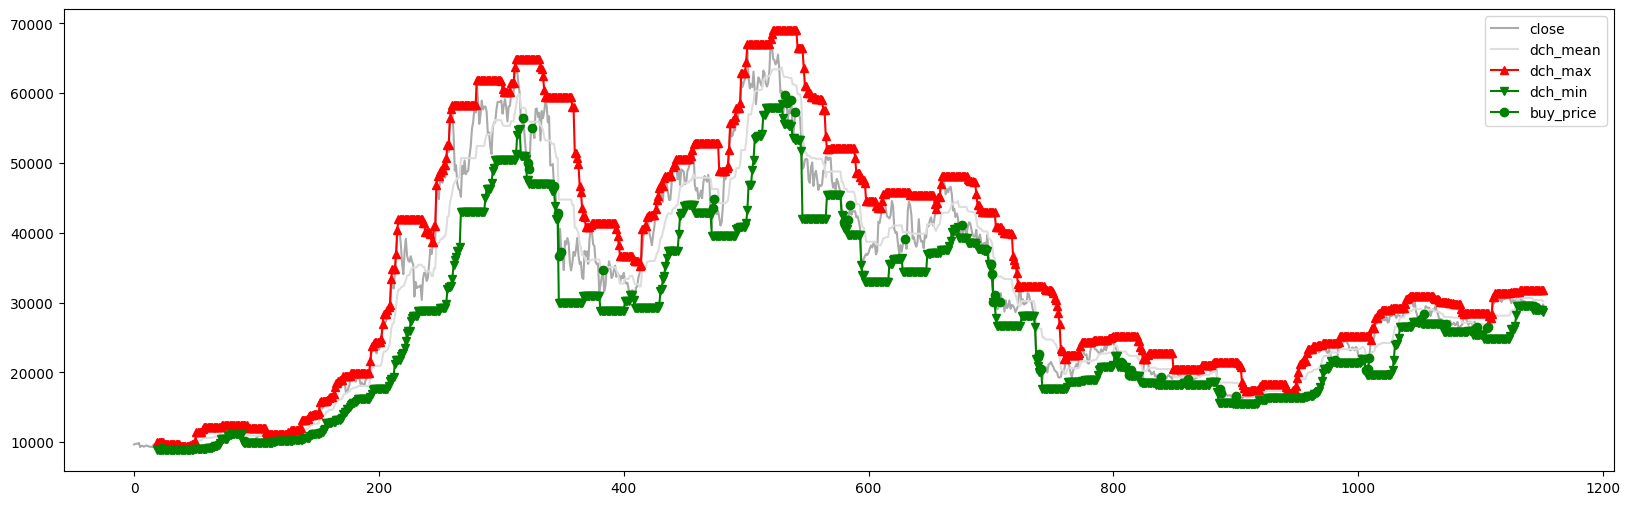

In [5]:

# Aplicar la función signal
df = Strategy().signal(df)

""" Pivots
df[['close','ma','max_pivot','min_pivot','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])
"""
df[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])


In [6]:
def next(row):
    pass

data = df[['datetime','open','low','high','close','volume','signal']].loc[0:5]

events = data['datetime'].copy()
pre_signal = 'NEUTRO' 
velas = data['datetime'].count()
print(f'Procesando ',end="\r")
for row in data.itertuples():
    next(row)
    pre_signal = 'NEUTRO' 
data['datetime'].count()

json_data = data.to_json(orient='records')
print(json_data)

[{"datetime":1591401600000,"open":9621.17,"low":9531.05,"high":9735.0,"close":9666.3,"volume":32752.950893,"signal":"NEUTRO"},{"datetime":1591488000000,"open":9666.85,"low":9372.46,"high":9802.0,"close":9746.99,"volume":57952.848385,"signal":"NEUTRO"},{"datetime":1591574400000,"open":9746.99,"low":9633.0,"high":9800.0,"close":9782.01,"volume":40664.664125,"signal":"NEUTRO"},{"datetime":1591660800000,"open":9782.0,"low":9570.0,"high":9877.0,"close":9772.43,"volume":46024.001289,"signal":"NEUTRO"},{"datetime":1591747200000,"open":9772.44,"low":9704.18,"high":9992.72,"close":9885.0,"volume":47130.762982,"signal":"NEUTRO"},{"datetime":1591833600000,"open":9885.22,"low":9113.0,"high":9964.0,"close":9280.4,"volume":94418.98473,"signal":"NEUTRO"}]


In [42]:
def calculate_pos(quote, qty_pos, mult):
        pos = []
        for i in range(qty_pos):
            pos_amount = quote * (1 - (1 / mult)) / (1 - 1 / mult**(qty_pos - i))
            pos.append(round(pos_amount, 2))
            quote -= pos_amount
        return pos[::-1]  # Invertir la lista

# Ejemplo de uso
capital = 3100
num_posiciones = 5  
multiplicador = 2.0

importes_posiciones = calculate_pos(capital, num_posiciones, multiplicador)

total_acumulado = 0

for i, importe in enumerate(importes_posiciones, start=1):
    total_acumulado += importe
    print(f'Posición {i}\tUSD {importe}\tTotal acumulado: USD {total_acumulado}')


Posición 1	USD 100.0	Total acumulado: USD 100.0
Posición 2	USD 200.0	Total acumulado: USD 300.0
Posición 3	USD 400.0	Total acumulado: USD 700.0
Posición 4	USD 800.0	Total acumulado: USD 1500.0
Posición 5	USD 1600.0	Total acumulado: USD 3100.0
